<a href="https://colab.research.google.com/github/OlyaMizonova/training-with-ml/blob/main/Diabetes_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Загрузить в датафрейм+
2. Построить пару графиков - зависимостей признаков друг от друга (можно поменять цвета, шрифты и все такое)+

3. Поискать пропущенные значения и поработать с ними (удалить/заменить)(в этих данных такого нет :[ )
4. Бонус - поискать выбросы с помощью квантилей и попутно разобраться, что же это такое (разобраться не получилось)
5. Закодировать категориальные переменные, если они есть+
7. Разделить на тренировочную и тестовую выборки+
8. Попробовать следующие модели:

 Классификация:

*  KNN +
*  Logistic regression+
*  SVM+
*  Decision Tree+
*  Random Forest+
*  Multi-layer perceptron+


9. Для каждой модели попробовать перебрать её гиперпараметры (их можно найти в документации). Перебора из 3 значений хватит, но вас никто не ограничивает в поиске лучшей модели+
10. Для задачи классификации использовать confusion matrix+


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sps

In [ ]:
dataset = pd.read_csv('diabetes.csv', encoding='latin-1')

In [ ]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Будем предсказывать болен человек или нет (проверяем, бинарный ли это признак)

In [ ]:
dataset['Outcome'].unique()

array([1, 0])

Смотрим, какие типы данных есть в датасете, чтобы убрать неподходящие, если они будут

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Далее несколько графиков - зависимостей друг от друга

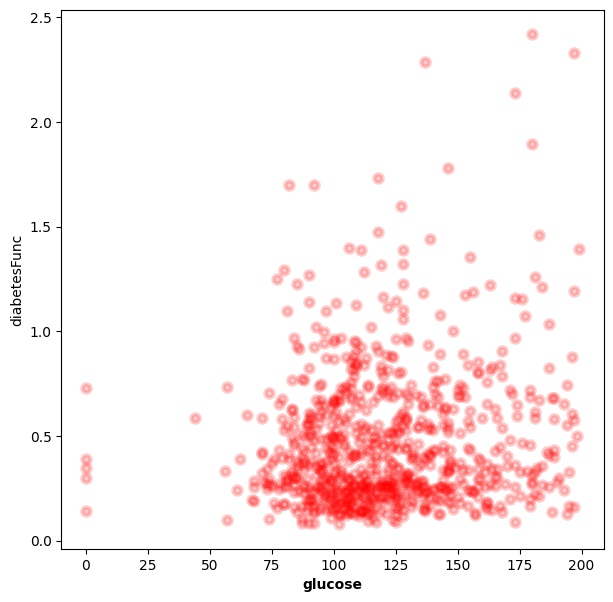

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(dataset['Glucose'], dataset['DiabetesPedigreeFunction'], color='red', linewidth=3, alpha=0.2)
plt.xlabel('glucose', fontweight='bold')
plt.ylabel('diabetesFunc')
plt.show()

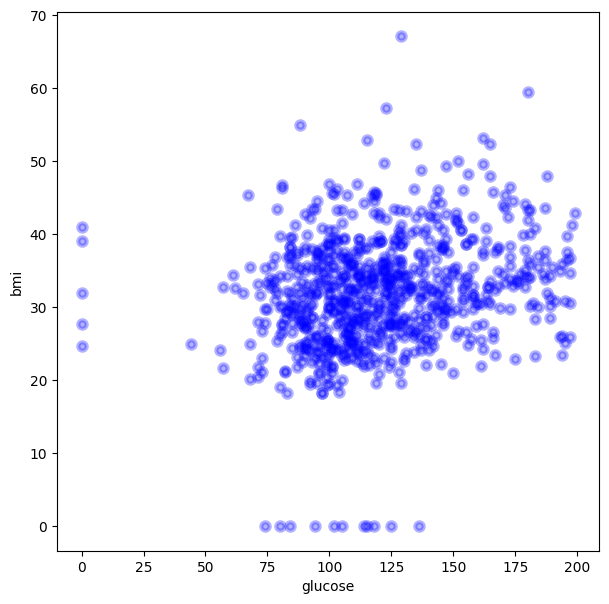

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(dataset['Glucose'], dataset['BMI'], color='blue', linewidth=3, alpha=0.3)
plt.xlabel('glucose')
plt.ylabel('bmi')
plt.show()

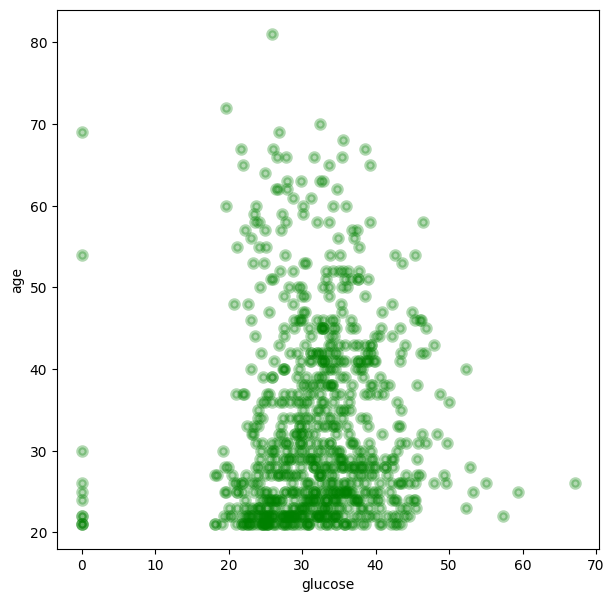

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(dataset['BMI'], dataset['Age'], color='green', linewidth=3, alpha=0.3)
plt.xlabel('bmi')
plt.ylabel('age')
plt.show()

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


здесь просто потренировалась кодировать категориальный бинарный признак, но в этой задачи в этом нет нужды, так как это и есть целевой признак

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder()

In [ ]:
encoded_categories = encoder.fit_transform(dataset[['Outcome']]).toarray()
encoded_categories

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [ ]:
encoded_df = pd.DataFrame(encoded_categories)
encoded_df.rename(columns = {0:'healthy',1:'sick'}, inplace = True)
encoded_df

,healthy,sick
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
763,1.0,0.0
764,1.0,0.0
765,1.0,0.0
766,0.0,1.0


In [ ]:
dataset_encoded = pd.concat([dataset, encoded_df], axis=1)
dataset_encoded.drop('Outcome',axis=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,healthy,sick
0,6,148,72,35,0,33.6,0.627,50,0.0,1.0
1,1,85,66,29,0,26.6,0.351,31,1.0,0.0
2,8,183,64,0,0,23.3,0.672,32,0.0,1.0
3,1,89,66,23,94,28.1,0.167,21,1.0,0.0
4,0,137,40,35,168,43.1,2.288,33,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.0,0.0
764,2,122,70,27,0,36.8,0.340,27,1.0,0.0
765,5,121,72,23,112,26.2,0.245,30,1.0,0.0
766,1,126,60,0,0,30.1,0.349,47,0.0,1.0


Разделим данные на обучающую и тестовую выборки

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=dataset.drop(['Outcome'],axis=1) #убрали столбец значений, который будем предсказывать
Y=dataset['Outcome']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9, test_size=0.1) #разделили на тренировочную и тестовую выборки

In [ ]:
Y_train.value_counts()# проверяем, равномерно ли разделились значения (в зависимости от этого - есть ли смысл предсказывать с помощью accuracy
                      # - здесь вроде нет смысла, но я просто тоже потренируюсь)

,count
Outcome,
0,451
1,240


In [ ]:
Y_test.value_counts()

,count
Outcome,
0,49
1,28


***Модель KNN***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=2)

In [ ]:
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(Y_test, preds)#здесь результат выглядит не очень, пусть большая часть верно предсказана
cm

array([[46,  3],
       [19,  9]])

In [ ]:
predictCM=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])#вручную зачем то посчитала
print(predictCM)

0.7142857142857143


In [ ]:
model.score(X_test, Y_test) #вроде это означает неплохой результат?

0.7142857142857143

изменение гиперпараметров


In [ ]:
scores=[]
for neighbors in [2,5,10,15]:
  model = KNeighborsClassifier(n_neighbors=neighbors)
  model.fit(X_train, Y_train)
  scores.append(model.score(X_test, Y_test))

In [ ]:
scores

[0.7142857142857143,
 0.6883116883116883,
 0.6883116883116883,
 0.6623376623376623]

увеличение числа соседей только ухудшает ситуацию

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test,preds))#с этим вообще не разобралась, просто искала что то на случай, если метрика accuracy не работает

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        49
           1       0.75      0.32      0.45        28

    accuracy                           0.71        77
   macro avg       0.73      0.63      0.63        77
weighted avg       0.72      0.71      0.68        77



Модель Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model1 = LogisticRegression(solver='liblinear')#дефолтный решатель просил увеличить количество итераций

model1.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [ ]:
preds = model1.predict(X_test)
confusion_matrix(Y_test, preds)

array([[42,  7],
       [14, 14]])

In [ ]:
model1.score(X_test, Y_test)

0.7272727272727273

In [ ]:
scores=[]
for n in range(1,10):
  model1 = LogisticRegression(C=1./n, solver='liblinear')
  model1.fit(X_train, Y_train)
  scores.append(model1.score(X_test, Y_test))

In [ ]:
scores

[0.7272727272727273,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143]

Модель SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [ ]:
model2 = svm.SVC()#kernel='linear', C=1, random_state=42
scores = cross_val_score(model2, X, Y)#, cv=5
scores

array([0.74675325, 0.73376623, 0.77272727, 0.79084967, 0.75163399])

In [ ]:
model2.fit(X_train, Y_train)

SVC()

In [ ]:
preds = model2.predict(X_test)

In [ ]:
confusion_matrix(Y_test, preds)

array([[41,  8],
       [15, 13]])

In [ ]:
model2.score(X_test, Y_test)

0.7012987012987013

In [ ]:
cParam = [0.1, 10., 100., 1000.]
gammaParam = [0.1, 0.01, 0.0001]

In [ ]:
for i in range (0,len(cParam)):
  for j in range (0,len(gammaParam)):
    model2 = svm.SVC(C = cParam[i],gamma = gammaParam[j])
    model2.fit(X_train, Y_train)
    print(model2.score(X_test, Y_test), 'C = ', cParam[i],'gamma = ', gammaParam[j])

0.6363636363636364 C =  0.1 gamma =  0.1
0.6363636363636364 C =  0.1 gamma =  0.01
0.7012987012987013 C =  0.1 gamma =  0.0001
0.6363636363636364 C =  10.0 gamma =  0.1
0.6493506493506493 C =  10.0 gamma =  0.01
0.7142857142857143 C =  10.0 gamma =  0.0001
0.6363636363636364 C =  100.0 gamma =  0.1
0.6493506493506493 C =  100.0 gamma =  0.01
0.7402597402597403 C =  100.0 gamma =  0.0001
0.6363636363636364 C =  1000.0 gamma =  0.1
0.6493506493506493 C =  1000.0 gamma =  0.01
0.7532467532467533 C =  1000.0 gamma =  0.0001


In [ ]:
from sklearn import tree
model3 = tree.DecisionTreeClassifier()
model3.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
preds = model3.predict(X_test)
confusion_matrix(Y_test, preds)

array([[38, 11],
       [14, 14]])

In [ ]:
model3.score(X_test, Y_test)

0.6753246753246753

In [ ]:
mx_dep =[x for x in range(4, 8, 2)]
mn_s_lf = [x for x in range(4, 8, 2)]
mn_s_splt=[x for x in range(4, 8, 2)]
crit = ["entropy", "gini"]

In [ ]:
print("score               criterion    maxDepth   minLeaf   minSplit ")
for c in crit:
  for mxd in mx_dep:
    for lf in mn_s_lf:
      for splt in mn_s_splt:
        model3 = tree.DecisionTreeClassifier(criterion = c, max_depth=mxd, min_samples_split=splt, min_samples_leaf=lf)
        model3.fit(X_train, Y_train)
        print(model3.score(X_test, Y_test),'   ', c,'     ',mxd,'       ',lf,'      ',splt)

score               criterion    maxDepth   minLeaf   minSplit 
0.7012987012987013     entropy       4         4        4
0.7012987012987013     entropy       4         4        6
0.7012987012987013     entropy       4         6        4
0.7012987012987013     entropy       4         6        6
0.7012987012987013     entropy       6         4        4
0.7012987012987013     entropy       6         4        6
0.7012987012987013     entropy       6         6        4
0.7012987012987013     entropy       6         6        6
0.7012987012987013     gini       4         4        4
0.7012987012987013     gini       4         4        6
0.7012987012987013     gini       4         6        4
0.7012987012987013     gini       4         6        6
0.7142857142857143     gini       6         4        4
0.7142857142857143     gini       6         4        6
0.7142857142857143     gini       6         6        4
0.7142857142857143     gini       6         6        6


Модель RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()
model4.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
preds = model4.predict(X_test)
confusion_matrix(Y_test, preds)

array([[41,  8],
       [13, 15]])

In [ ]:
model4.score(X_test, Y_test)

0.7272727272727273

In [ ]:
treesNum = [50,100,200]
mn_s_lf = [x for x in range(2, 6, 2)]
mn_s_splt=[x for x in range(4, 8, 2)]
crit = ["entropy", "gini"]

In [ ]:
print("score               criterion    treesNumber   minLeaf   minSplit ")
for c in crit:
  for tnm in treesNum:
    for lf in mn_s_lf:
      for splt in mn_s_splt:
        model4 = RandomForestClassifier(n_estimators=tnm,criterion = c, min_samples_split=splt, min_samples_leaf=lf)
        model4.fit(X_train, Y_train)
        print(model4.score(X_test, Y_test),'   ', c,'     ',tnm,'       ',lf,'      ',splt)

score               criterion    treesNumber   minLeaf   minSplit 
0.7532467532467533     entropy       50         2        4
0.7662337662337663     entropy       50         2        6
0.7272727272727273     entropy       50         4        4
0.7402597402597403     entropy       50         4        6
0.7142857142857143     entropy       100         2        4
0.7142857142857143     entropy       100         2        6
0.7402597402597403     entropy       100         4        4
0.7532467532467533     entropy       100         4        6
0.7402597402597403     entropy       200         2        4
0.7272727272727273     entropy       200         2        6
0.7402597402597403     entropy       200         4        4
0.7272727272727273     entropy       200         4        6
0.7532467532467533     gini       50         2        4
0.7662337662337663     gini       50         2        6
0.7272727272727273     gini       50         4        4
0.7272727272727273     gini       50         4   

In [ ]:
from sklearn.neural_network import MLPClassifier
model5=MLPClassifier()
model5.fit(X_train, Y_train)

MLPClassifier()

In [ ]:
preds = model5.predict(X_test)
confusion_matrix(Y_test, preds)

array([[43,  6],
       [14, 14]])

In [ ]:
model5.score(X_test, Y_test)

0.7402597402597403

In [ ]:
import warnings
warnings.filterwarnings('ignore')
hidden_layer_sizes=[100,200]
activ=['identity', 'logistic', 'tanh', 'relu']

In [ ]:
print("score               activation    hidden_layer_sizes")
for hls in hidden_layer_sizes:
  for ac in activ:
    model5 = MLPClassifier(hidden_layer_sizes=hls,activation=ac)
    model5.fit(X_train, Y_train)
    print(model5.score(X_test, Y_test),'   ', ac,'     ',hls)

score               activation    hidden_layer_sizes
0.7532467532467533     identity       100
0.7402597402597403     logistic       100
0.7532467532467533     tanh       100
0.7402597402597403     relu       100
0.7532467532467533     identity       200
0.7402597402597403     logistic       200
0.7272727272727273     tanh       200
0.7272727272727273     relu       200
